In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import logging
import time
import datetime

import nltk
nltk.download('punkt')  # Download punkt tokenizer if not already downloaded
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    level=logging.INFO, 
    filename='./logs/Exploratory Data Analysis.log')   

In [4]:
logging.info("==========================================================================================================")
logging.info("Exploratory Data Analysis Started ")

### Load train, test and validation CNN Dailymail dataset

In [5]:
train_df = pd.read_csv('./input/train.csv')
test_df=pd.read_csv('./input/test.csv')
validation_df=pd.read_csv('./input/validation.csv')

logging.info(f"Shapes - Train Dataset : {train_df.shape}, Test Dataset : {test_df.shape}, Validation Dataset: {validation_df.shape}")

print(train_df.shape, test_df.shape, validation_df.shape)

(287113, 3) (11490, 3) (13368, 3)


In [6]:
train_df.head(5)

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [7]:
print('Article:\n', train_df.iloc[0]['article'][:1000])
print('Summary:\n', train_df.iloc[0]['highlights'])


Article:
 By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for newly 

In [8]:
for index in range(10):
    print('Article:\n', train_df.iloc[index]['article'][:200])

Article:
 By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds 
Article:
 (CNN) -- Ralph Mata was an internal affairs lieutenant for the Miami-Dade Police Department, working in the division that investigates allegations of wrongdoing by cops. Outside the office, authoritie
Article:
 A drunk driver who killed a young woman in a head-on crash while checking his mobile phone has been jailed for six years. Craig Eccleston-Todd, 27, was driving home from a night at a pub when he recei
Article:
 (CNN) -- With a breezy sweep of his pen President Vladimir Putin wrote a new chapter into Crimea's turbulent history, committing the region to a future returned to Russian domain. Sixty years prior, U
Article:
 Fleetwood are the only team still to have a 100% record in Sky Bet League One as a 2-0 win over Scunthorpe sent Graham Alexander’s men top of the 

In [9]:
train_null_articles = train_df.isnull().sum()
logging.info(f"Train Null Articles :\n {train_null_articles}")
train_null_articles      

id            0
article       0
highlights    0
dtype: int64

In [10]:
test_null_articles  = test_df.isnull().sum()
logging.info(f"Test Null Articles :\n {test_null_articles}")
test_null_articles  

id            0
article       0
highlights    0
dtype: int64

In [11]:
validation_null_articles = validation_df.isnull().sum()
logging.info(f"Validation Null Articles :\n {validation_null_articles}")
validation_null_articles  

id            0
article       0
highlights    0
dtype: int64

In [12]:
#Check Duplicates
train_duplicates = train_df.duplicated(subset= ['article', 'highlights']).sum()
logging.info(f"Train Dataset Duplicates - {train_duplicates}")
train_duplicates

3098

### Computation of words count in dataset

In [13]:
# Computation of Length of article and hughlights
def article_len(row):
    return len(row['article'].split())

def highlights_len(row):
    return len(row['highlights'].split())

logging.info(f"Computation of words count in train, test and validation Dataset")
train_df['article_len'] = train_df.apply(lambda r: article_len(r), axis= 1)
train_df['highlights_len'] = train_df.apply(lambda r: highlights_len(r), axis= 1)

test_df['article_len'] = test_df.apply(lambda r: article_len(r), axis= 1)
test_df['highlights_len'] = test_df.apply(lambda r: highlights_len(r), axis= 1)

validation_df['article_len'] = validation_df.apply(lambda r: article_len(r), axis= 1)
validation_df['highlights_len'] = validation_df.apply(lambda r: highlights_len(r), axis= 1)

In [14]:
train_df.head(5)

,id,article,highlights,article_len,highlights_len
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",198,37
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,392,38
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",808,69
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...,531,53
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...,580,67


In [15]:
# Dropping redundent Id column
logging.info(f"Dropping ID column from train, test and validation Dataset")
train_df = train_df.drop('id', axis= 1)
test_df = test_df.drop('id', axis= 1)
validation_df = validation_df.drop('id', axis= 1)

In [16]:
train_df.head()

,article,highlights,article_len,highlights_len
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",198,37
1,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,392,38
2,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",808,69
3,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...,531,53
4,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...,580,67


In [17]:
desc = train_df.describe()
logging.info(f"Train dataset stats \n {desc}")
desc

,article_len,highlights_len
count,287113.000000,287113.000000
mean,691.869494,51.574101
std,336.500035,21.256336
min,8.000000,4.000000
25%,443.000000,38.000000
50%,632.000000,48.000000
75%,877.000000,60.000000
max,2347.000000,1296.000000


In [18]:
train_unique_counts = train_df['article_len']
test_unique_counts = test_df['article_len']
validation_unique_counts = validation_df['article_len']
percentiles = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 99]
train_percentile_values = np.percentile(train_unique_counts, percentiles)
test_percentile_values = np.percentile(test_unique_counts, percentiles)
validation_percentile_values = np.percentile(validation_unique_counts, percentiles)

for p, value in zip(percentiles, train_percentile_values):
    print(f"{p}th percentile: {value}")
print()

for p, value in zip(percentiles, test_percentile_values):
    print(f"{p}th percentile: {value}")
print()

for p, value in zip(percentiles, validation_percentile_values):
    print(f"{p}th percentile: {value}")
    


1th percentile: 161.0
10th percentile: 313.0
20th percentile: 404.0
30th percentile: 480.0
40th percentile: 554.0
50th percentile: 632.0
60th percentile: 717.0
70th percentile: 817.0
80th percentile: 949.0
90th percentile: 1166.0
95th percentile: 1363.0
99th percentile: 1674.0

1th percentile: 164.0
10th percentile: 298.0
20th percentile: 382.0
30th percentile: 458.0
40th percentile: 535.0
50th percentile: 613.0
60th percentile: 705.0
70th percentile: 812.0
80th percentile: 952.0
90th percentile: 1188.0
95th percentile: 1399.5499999999993
99th percentile: 1689.0

1th percentile: 165.0
10th percentile: 292.0
20th percentile: 378.0
30th percentile: 454.0
40th percentile: 530.0
50th percentile: 608.0
60th percentile: 697.0
70th percentile: 804.8999999999996
80th percentile: 944.0
90th percentile: 1168.0
95th percentile: 1370.0
99th percentile: 1667.33


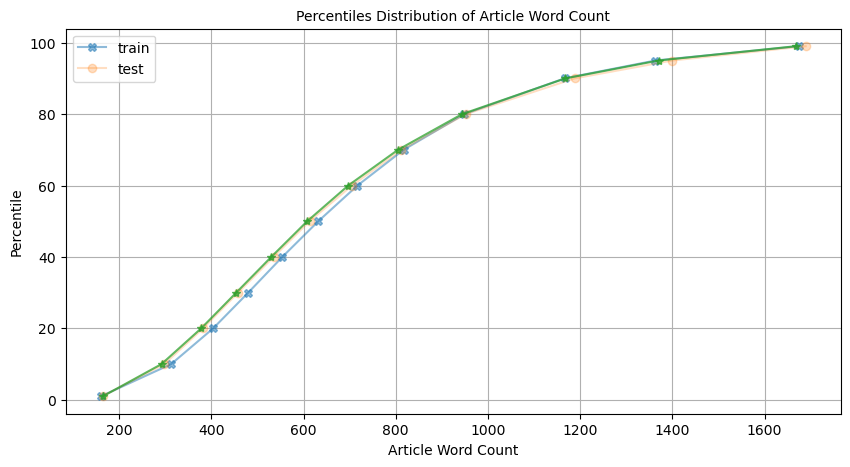

In [19]:
logging.info(f"Plotting Percentile Distribution of word count for train, test and validation Dataset")
plt.figure(figsize=(10, 5))

plt.plot(train_percentile_values,percentiles, marker='X', linestyle='-',  alpha=0.5)
plt.plot(test_percentile_values,percentiles, marker='o', linestyle='-',  alpha=0.25)
plt.plot(validation_percentile_values, percentiles, marker='*', linestyle='-',  alpha=0.75)

plt.xlabel('Article Word Count')
plt.ylabel('Percentile')
plt.title('Percentiles Distribution of Article Word Count',fontsize=10)
plt.legend(['train','test'])

plt.grid(True)

plt.show()

### Histogram of word count in dataset

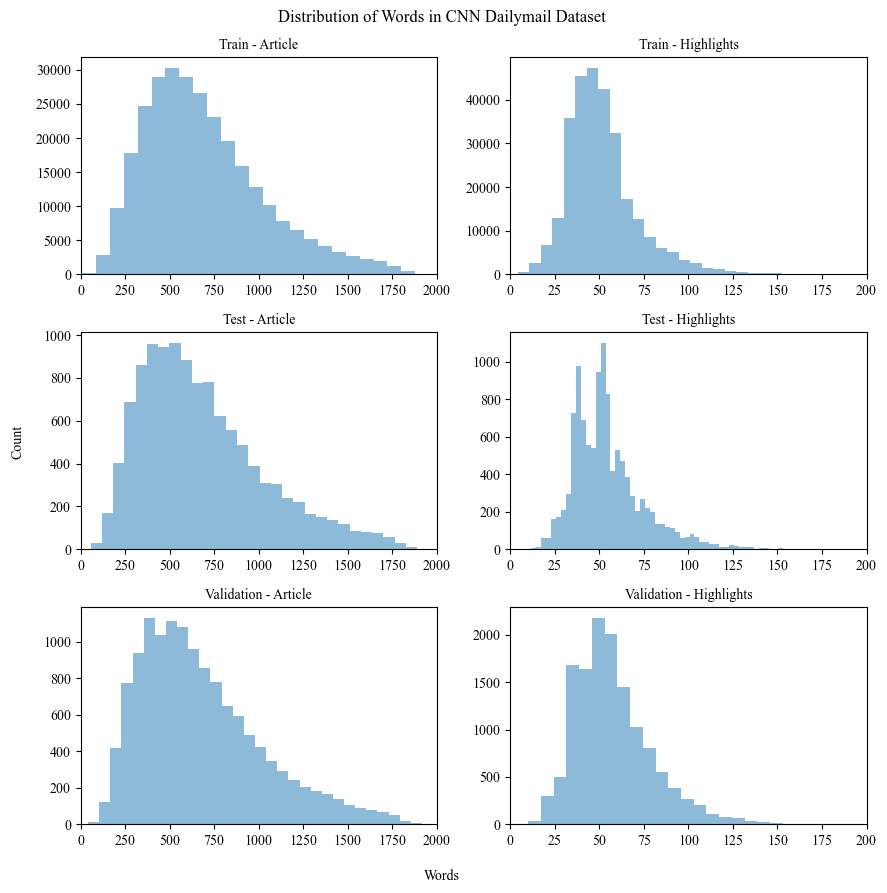

In [20]:
logging.info(f"Plotting word count Histogram for train, test and validation Dataset")
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Generating sample data
data = [np.random.randn(1000) for _ in range(6)]

# Creating subplots
fig, axs = plt.subplots(3, 2, figsize=(9, 9))

# Add titles
fig.suptitle('Distribution of Words in CNN Dailymail Dataset', fontsize=12)
fig.supxlabel('Words',fontsize='medium')
fig.supylabel('Count',fontsize='medium')


axs[0, 0].hist(train_df['article_len'], bins=30,  alpha=0.5)
axs[0, 0].set_xlim(0, 2000)  # Example range from -5 to 5
axs[0, 0].set_title('Train - Article', fontsize=10)

axs[0, 1].hist(train_df['highlights_len'], bins=200,  alpha=0.5)
axs[0, 1].set_xlim(0, 200)  # Example range from -5 to 5
axs[0, 1].set_title('Train - Highlights', fontsize=10)


axs[1, 0].hist(test_df['article_len'], bins=30,  alpha=0.5)
axs[1, 0].set_xlim(0, 2000)   # Example range from -5 to 5
axs[1, 0].set_title('Test - Article', fontsize=10)

axs[1, 1].hist(test_df['highlights_len'], bins=200,  alpha=0.5)
axs[1, 1].set_xlim(0, 200)   # Example range from -5 to 5
axs[1, 1].set_title('Test - Highlights', fontsize=10)

axs[2, 0].hist(validation_df['article_len'], bins=30,  alpha=0.5)
axs[2, 0].set_xlim(0, 2000) 
axs[2, 0].set_title('Validation - Article', fontsize=10)

axs[2, 1].hist(validation_df['highlights_len'], bins=200,  alpha=0.5)
axs[2, 1].set_xlim(0, 200)   # Example range from -5 to 5
axs[2, 1].set_title('Validation - Highlights', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Histogram of sentences count in dataset

In [21]:
# Tokenize each article into sentences and count the number of sentences
train_df['article_sentence_counts'] = train_df['article'].apply(lambda x: len(sent_tokenize(x)))
train_df['highlights_sentence_counts'] = train_df['highlights'].apply(lambda x: len(sent_tokenize(x)))

# Calculate the average number of sentences
train_art_avg_sentence_count = train_df['article_sentence_counts'].mean()
train_high_avg_sentence_count = train_df['highlights_sentence_counts'].mean()

print("Train Article Avg # of sentences per article:", train_art_avg_sentence_count)
print("Train Highlights Avg # of sentences per article:", train_high_avg_sentence_count)

Train Article Avg # of sentences per article: 39.09570447872441
Train Highlights Avg # of sentences per article: 3.6826441157314367


In [22]:
# Tokenize each article into sentences and count the number of sentences
test_df['article_sentence_counts'] = test_df['article'].apply(lambda x: len(sent_tokenize(x)))
test_df['highlights_sentence_counts'] = test_df['highlights'].apply(lambda x: len(sent_tokenize(x)))

# Calculate the average number of sentences
test_art_avg_sentence_count = test_df['article_sentence_counts'].mean()
test_high_avg_sentence_count = test_df['highlights_sentence_counts'].mean()

print("Test Article Avg # of sentences per article:", test_art_avg_sentence_count)
print("Test Highlights Avg # of sentences per article:", test_high_avg_sentence_count)

Test Article Avg # of sentences per article: 33.37006092254134
Test Highlights Avg # of sentences per article: 3.7911227154046996


In [23]:
# Tokenize each article into sentences and count the number of sentences
validation_df['article_sentence_counts'] = validation_df['article'].apply(lambda x: len(sent_tokenize(x)))
validation_df['highlights_sentence_counts'] = validation_df['highlights'].apply(lambda x: len(sent_tokenize(x)))

# Calculate the average number of sentences
validation_art_avg_sentence_count = validation_df['article_sentence_counts'].mean()
validation_high_avg_sentence_count = validation_df['highlights_sentence_counts'].mean()

print("Validation Article Avg # of sentences per article:", validation_art_avg_sentence_count)
print("Validation Highlights Avg # of sentences per article:", validation_high_avg_sentence_count)

Validation Article Avg # of sentences per article: 32.79061938958707
Validation Highlights Avg # of sentences per article: 4.000598444045481


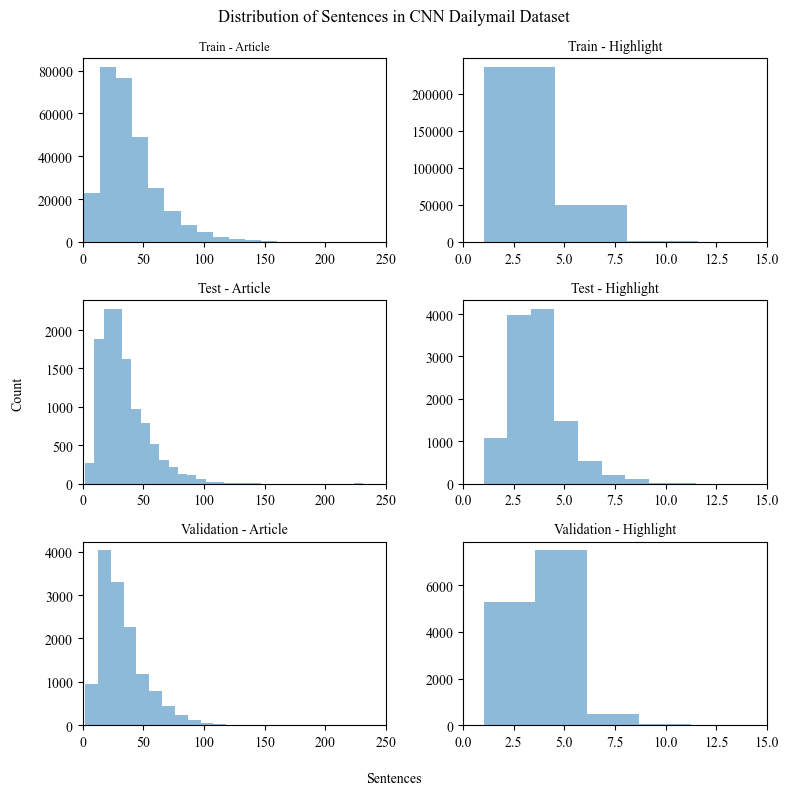

In [24]:
logging.info(f"Plotting sentences count Histogram for train, test and validation Dataset")

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Generating sample data
data = [np.random.randn(1000) for _ in range(6)]

# Creating subplots
fig, axs = plt.subplots(3, 2, figsize=(8, 8))

# Add titles
fig.suptitle('Distribution of Sentences in CNN Dailymail Dataset', fontsize=12)
fig.supxlabel('Sentences',fontsize='medium')
fig.supylabel('Count',fontsize='medium')

axs[0, 0].hist(train_df['article_sentence_counts'], bins=30,  alpha=0.5)
axs[0, 0].set_xlim(0, 250)  
axs[0, 0].set_title('Train - Article', fontsize=9)

axs[0, 1].hist(train_df['highlights_sentence_counts'], bins=30,  alpha=0.5)
axs[0, 1].set_xlim(0, 15) 
axs[0, 1].set_title('Train - Highlight', fontsize=10)

axs[1, 0].hist(test_df['article_sentence_counts'], bins=30,  alpha=0.5)
axs[1, 0].set_xlim(0, 250)   
axs[1, 0].set_title('Test - Article', fontsize=10)

axs[1, 1].hist(test_df['highlights_sentence_counts'], bins=30,  alpha=0.5)
axs[1, 1].set_xlim(0, 15)  
axs[1, 1].set_title('Test - Highlight', fontsize=10)

axs[2, 0].hist(validation_df['article_sentence_counts'], bins=30,  alpha=0.5)
axs[2, 0].set_xlim(0, 250) 
axs[2, 0].set_title('Validation - Article', fontsize=10)

axs[2, 1].hist(validation_df['highlights_sentence_counts'], bins=30,  alpha=0.5)
axs[2, 1].set_xlim(0, 15)   
axs[2, 1].set_title('Validation - Highlight', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [25]:
import pandas as pd
import nltk
nltk.download('punkt')  # Download punkt tokenizer if not already downloaded
from nltk.tokenize import word_tokenize

# Tokenize each article into words and count the number of words
train_df['Article_word_counts'] = train_df['article'].apply(lambda x: len(word_tokenize(x)))
train_df['Highlights_word_counts'] = train_df['highlights'].apply(lambda x: len(word_tokenize(x)))

test_df['Article_word_counts'] = test_df['article'].apply(lambda x: len(word_tokenize(x)))
test_df['Highlights_word_counts'] = test_df['highlights'].apply(lambda x: len(word_tokenize(x)))

validation_df['Article_word_counts'] = validation_df['article'].apply(lambda x: len(word_tokenize(x)))
validation_df['Highlights_word_counts'] = validation_df['highlights'].apply(lambda x: len(word_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
train_df.head()

,article,highlights,article_len,highlights_len,article_sentence_counts,highlights_sentence_counts,Article_word_counts,Highlights_word_counts
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",198,37,15,3,219,40
1,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,392,38,18,3,446,42
2,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",808,69,35,5,925,74
3,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...,531,53,22,3,589,55
4,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...,580,67,25,6,657,69


In [27]:
# Calculate the average number of words
train_art_avg_word_count = train_df['Article_word_counts'].mean()
train_high_avg_word_count = train_df['Highlights_word_counts'].mean()

test_art_avg_word_count = test_df['Article_word_counts'].mean()
test_high_avg_word_count = test_df['Highlights_word_counts'].mean()

validation_art_avg_word_count = validation_df['Article_word_counts'].mean()
validation_high_avg_word_count = validation_df['Highlights_word_counts'].mean()

logging.info(f"Train Article Avg # of words per article: {train_art_avg_word_count}")
logging.info(f"Train Highlights Avg # of words per article: {train_high_avg_word_count}")

logging.info(f"Test Article Avg # of words per article: {test_art_avg_word_count}")
logging.info(f"Test Highlights Avg # of words per article: {test_high_avg_word_count}")

logging.info(f"Validation Article Avg # of words per article:{validation_art_avg_word_count}")
logging.info(f"Validation Highlights Avg # of words per article:{validation_high_avg_word_count}")

In [28]:
logging.info(f"Plotting Average # of Sentences for train, test and validation dataset")

ds_list = ['Train', 'Test' , 'Validation']
article_sentence_avg_count = [train_art_avg_sentence_count, test_art_avg_sentence_count, validation_art_avg_sentence_count]
article_words_avg_count = [train_art_avg_word_count,test_art_avg_word_count,validation_art_avg_word_count]
highlights_sentence_avg_count = [train_high_avg_sentence_count, test_high_avg_sentence_count, validation_high_avg_sentence_count]
highlights_words_avg_count = [train_high_avg_word_count,test_high_avg_word_count,validation_high_avg_word_count]


Text(0, 0.5, 'Avg # of Sentences')

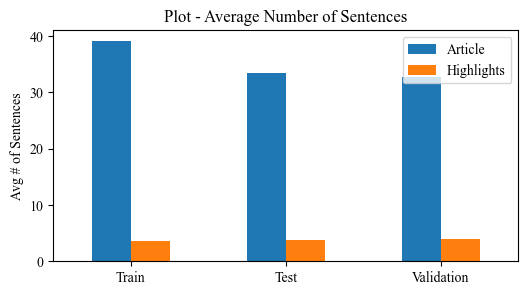

In [29]:
sentences_plotdata = pd.DataFrame(
    {
      "Article":[train_art_avg_sentence_count, test_art_avg_sentence_count,validation_art_avg_sentence_count],
      "Highlights":[train_high_avg_sentence_count,test_high_avg_sentence_count,validation_high_avg_sentence_count]
    },
      index =['Train', 'Test', 'Validation']
)


sentences_plotdata.plot(kind="bar",figsize=(6, 3))

plt.title("Plot - Average Number of Sentences", fontsize=12, fontname='Times New Roman')
plt.xticks(rotation=0 , fontsize=10, fontname='Times New Roman')
plt.legend(prop={'family': 'Times New Roman'})
plt.ylabel("Avg # of Sentences", fontsize=10, fontname='Times New Roman')

In [30]:
logging.info(f"Average Sentences:\n{sentences_plotdata}")
sentences_plotdata

,Article,Highlights
Train,39.095704,3.682644
Test,33.370061,3.791123
Validation,32.790619,4.000598


Text(0, 0.5, 'Avg # of Words')

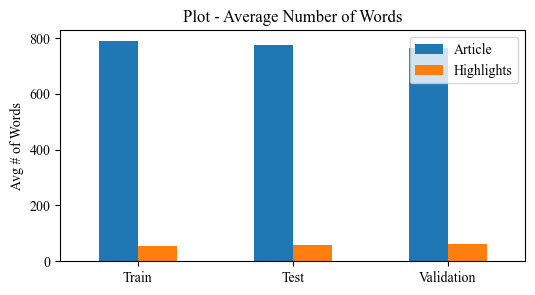

In [31]:
logging.info(f"Plotting Average # of words for train, test and validation dataset")

words_plotdata = pd.DataFrame(
    {
      "Article":[train_art_avg_word_count, test_art_avg_word_count,validation_art_avg_word_count],
      "Highlights":[train_high_avg_word_count,test_high_avg_word_count,validation_high_avg_word_count]
    },
      index =['Train', 'Test', 'Validation']
)


words_plotdata.plot(kind="bar",figsize=(6, 3))

plt.title("Plot - Average Number of Words", fontsize=12, fontname='Times New Roman')
plt.xticks(rotation=0 , fontsize=10, fontname='Times New Roman')
plt.legend(prop={'family': 'Times New Roman'})
plt.ylabel("Avg # of Words", fontsize=10, fontname='Times New Roman')

In [32]:
logging.info(f"Average words:\n{words_plotdata}")
words_plotdata

,Article,Highlights
Train,788.265321,54.683585
Test,773.225762,57.754917
Validation,764.394225,60.813435


In [33]:
train_df.to_csv('./output/train_metrics.csv')
test_df.to_csv('./output/test_metrics.csv')
validation_df.to_csv('./output/validation_metrics.csv')

logging.info(f"Saving metrics of train, test and validation dataset completed")

In [34]:
train_df.head()

,article,highlights,article_len,highlights_len,article_sentence_counts,highlights_sentence_counts,Article_word_counts,Highlights_word_counts
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ...",198,37,15,3,219,40
1,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...,392,38,18,3,446,42
2,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t...",808,69,35,5,925,74
3,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...,531,53,22,3,589,55
4,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...,580,67,25,6,657,69


In [35]:
test_df.head()

,article,highlights,article_len,highlights_len,article_sentence_counts,highlights_sentence_counts,Article_word_counts,Highlights_word_counts
0,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...,370,36,16,3,409,36
1,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...,311,38,14,3,359,42
2,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...,110,35,6,3,116,36
3,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...,308,44,15,4,336,45
4,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6...",749,61,34,3,861,64


In [36]:
validation_df.head()

,article,highlights,article_len,highlights_len,article_sentence_counts,highlights_sentence_counts,Article_word_counts,Highlights_word_counts
0,"Sally Forrest, an actress-dancer who graced th...","Sally Forrest, an actress-dancer who graced th...",264,58,15,3,307,63
1,A middle-school teacher in China has inked hun...,Works include pictures of Presidential Palace ...,551,36,27,3,624,36
2,A man convicted of killing the father and sist...,"Iftekhar Murtaza, 29, was convicted a year ago...",465,114,20,6,529,125
3,Avid rugby fan Prince Harry could barely watch...,Prince Harry in attendance for England's crunc...,580,51,27,4,640,55
4,A Triple M Radio producer has been inundated w...,Nick Slater's colleagues uploaded a picture to...,338,36,18,3,386,39


In [37]:
logging.info("Exploratory Data Analysis Completed ")